# Import Packages

In [1]:
import fitbit
import gather_keys_oauth2 as Oauth2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Getting Permissions

Get your client information by signing up at the [FitBit API](https://dev.fitbit.com/login)

In [2]:
CLIENT_ID ='******'
CLIENT_SECRET = '****************************'

In [3]:
server = Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()

ACCESS_TOKEN = str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN = str(server.fitbit.client.session.token['refresh_token'])

auth2_client = fitbit.Fitbit(CLIENT_ID, CLIENT_SECRET, oauth2 = True, access_token=ACCESS_TOKEN, refresh_token=REFRESH_TOKEN)

[18/Sep/2021:09:40:13] ENGINE Listening for SIGTERM.
[18/Sep/2021:09:40:13] ENGINE Bus STARTING
[18/Sep/2021:09:40:13] ENGINE Set handler for console events.
CherryPy Checker:
The Application mounted at '' has an empty config.

[18/Sep/2021:09:40:13] ENGINE Started monitor thread 'Autoreloader'.
[18/Sep/2021:09:40:13] ENGINE Serving on http://127.0.0.1:8080
[18/Sep/2021:09:40:13] ENGINE Bus STARTED


127.0.0.1 - - [18/Sep/2021:09:40:29] "GET /?code=14ba23223236172b821a5ba9ff2e5e612bfb57c3&state=04EUgUwCwz1v768fPugiTDRTEhOPxz HTTP/1.1" 200 122 "" "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0"


[18/Sep/2021:09:40:30] ENGINE Bus STOPPING
[18/Sep/2021:09:40:30] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[18/Sep/2021:09:40:30] ENGINE Stopped thread 'Autoreloader'.
[18/Sep/2021:09:40:30] ENGINE Removed handler for console events.
[18/Sep/2021:09:40:30] ENGINE Bus STOPPED
[18/Sep/2021:09:40:30] ENGINE Bus EXITING
[18/Sep/2021:09:40:30] ENGINE Waiting for child threads to terminate...
[18/Sep/2021:09:40:30] ENGINE Bus EXITED
[18/Sep/2021:09:40:30] ENGINE Waiting for thread Thread-17.


# Defining Date Ranges

In [4]:
yesterday = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d"))

yesterday2 = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y-%m-%d"))

today = str(datetime.datetime.now().strftime("%Y%m%d"))

# Data Extraction

## Extracting Heart Rate of Data Range

In [5]:
heart_start = str((datetime.datetime.now() - datetime.timedelta(days=60)).strftime("%Y-%m-%d"))

heart_end = str(datetime.datetime.now().strftime("%Y-%m-%d"))

In [6]:
url = f"https://api.fitbit.com/1/user/-/activities/heart/date/{heart_start}/{heart_end}.json"

heart_data = auth2_client.make_request(url)


In [10]:
heart_date = []
resting_heart_rate = []
rest_min = []
fatb_min = []
card_min = []
peak_min = []

for day in heart_data['activities-heart']:
    value = day['value']
    if 'restingHeartRate' in value:
        resting_heart_rate.append(value['restingHeartRate'])
        heart_date.append(day['dateTime'])
        heart_zones = value['heartRateZones']
        
        for zone in heart_zones:
            if zone['name'] == 'Out of Range':
                rest_min.append(zone['minutes'])
            elif zone['name'] == 'Fat Burn':
                fatb_min.append(zone['minutes'])
            elif zone['name'] == 'Cardio':
                card_min.append(zone['minutes'])
            elif zone['name'] == 'Peak':
                peak_min.append(zone['minutes'])

print(len(heart_date))

55


In [67]:
heart_df = pd.DataFrame({'Date': heart_date, 'Resting Heart Rate': resting_heart_rate, 'Rest [min]': rest_min, 'Fat Burn [min]': fatb_min, 'Cardio [min]': card_min, 'Peak [min]': peak_min})

pd.set_option("display.max_rows", None, "display.max_columns", None)

heart_df['Total Exercise Time [min]'] = heart_df.iloc[:, -3:].sum(axis=1)
heart_df

,Date,Resting Heart Rate,Rest [min],Fat Burn [min],Cardio [min],Peak [min],Total Exercise Time [min]
0,2021-07-25,68,905,57,2,0,59
1,2021-07-26,62,1374,63,0,0,63
2,2021-07-27,59,1398,33,0,0,33
3,2021-07-28,60,1407,27,0,0,27
4,2021-07-29,59,1418,16,0,0,16
5,2021-07-30,58,1212,12,0,0,12
6,2021-07-31,57,1413,25,0,0,25
7,2021-08-01,57,1394,41,0,0,41
8,2021-08-02,57,1404,31,0,0,31
9,2021-08-03,56,1422,12,0,0,12


## Extraction of long term sleep data

### Establishing the start and end of range

In [17]:
slp_start = str((datetime.datetime.now() - datetime.timedelta(days=60)).strftime("%Y-%m-%d"))

slp_end = str(datetime.datetime.now().strftime("%Y-%m-%d"))

### Calling API and extracting useful data

In [18]:
url = f"https://api.fitbit.com/1.2/user/-/sleep/date/{slp_start}/{slp_end}.json"

slp_data = auth2_client.make_request(url)

For my own health interest, I will mainly look at the duration of my sleep as a time series and look at what the general trend of my sleep is since I started using Fitbit.

In [19]:
sleep_date = []
total_asleep_duration = []
sleep_time = []
wake_time = []
deep_sleep_time = []

for day in slp_data['sleep']:

    if 'deep' in day['levels']['summary']:
        sleep_date.append(day['dateOfSleep'])
        total_asleep_duration.append(day['minutesAsleep']/60)
        sleep_time.append(day['startTime'][11:])
        wake_time.append(day['endTime'][11:])
        deep_sleep_time.append(day['levels']['summary']['deep']['minutes'])


In [20]:
slp_df = pd.DataFrame({'Date': sleep_date, 'Time Asleep': total_asleep_duration, 'Fall Asleep Time': sleep_time, 'Waking Time': wake_time, 'Total Deep Sleep Duration': deep_sleep_time})

slp_df = slp_df.iloc[::-1]

In [21]:
slp_df = slp_df.reset_index()
slp_df

,index,Date,Time Asleep,Fall Asleep Time,Waking Time,Total Deep Sleep Duration
0,52,2021-07-26,5.700000,22:26:30.000,04:59:00.000,65
1,51,2021-07-27,5.416667,22:27:00.000,05:15:30.000,46
2,50,2021-07-28,4.633333,00:09:30.000,06:02:30.000,57
3,49,2021-07-29,4.750000,23:32:00.000,05:23:30.000,39
4,48,2021-07-30,5.950000,23:11:30.000,06:05:30.000,56
5,47,2021-07-31,5.783333,22:41:00.000,05:34:00.000,54
6,46,2021-08-01,5.700000,22:53:00.000,05:36:00.000,43
7,45,2021-08-02,4.766667,01:28:00.000,06:53:00.000,50
8,44,2021-08-03,7.300000,22:40:30.000,07:23:00.000,88
9,43,2021-08-04,5.816667,23:18:30.000,06:28:00.000,84


An initial look at the data already shows a general trend where sleep is around 6 hours, but there have been instances where sleep is less than 4 hours, which I usually chalk up to unavoidable times where I have to stay up late. As such, it would be useful to have a dataset where days when the sleep duration is less than 4 hours is removed. 

In [44]:
slp_df_clean = slp_df[slp_df['Time Asleep'] > 4]
slp_df_clean

,index,Date,Time Asleep,Fall Asleep Time,Waking Time,Total Deep Sleep Duration
0,52,2021-07-26,5.700000,22:26:30.000,04:59:00.000,65
1,51,2021-07-27,5.416667,22:27:00.000,05:15:30.000,46
2,50,2021-07-28,4.633333,00:09:30.000,06:02:30.000,57
3,49,2021-07-29,4.750000,23:32:00.000,05:23:30.000,39
4,48,2021-07-30,5.950000,23:11:30.000,06:05:30.000,56
5,47,2021-07-31,5.783333,22:41:00.000,05:34:00.000,54
6,46,2021-08-01,5.700000,22:53:00.000,05:36:00.000,43
7,45,2021-08-02,4.766667,01:28:00.000,06:53:00.000,50
8,44,2021-08-03,7.300000,22:40:30.000,07:23:00.000,88
9,43,2021-08-04,5.816667,23:18:30.000,06:28:00.000,84


# Data Analysis and Predictions

In [23]:
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

## Plot and Histogram of Sleep

### Analysis of Sleep Data

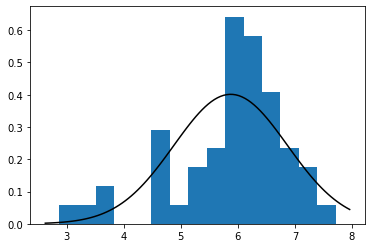

In [24]:
plt.hist(slp_df['Time Asleep'], bins = 15, density = True)

mu, sigma = norm.fit(slp_df['Time Asleep'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k')


Evidently we see that the distribution is slightly skewed by the days of anomalously poor sleep. It makes sense to repeat the fitting again with cleaned data.

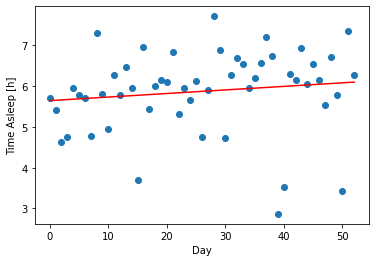

In [25]:
X = slp_df.index.values.reshape(-1, 1)
Y = slp_df['Time Asleep'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.xlabel('Day')
plt.ylabel('Time Asleep [h]')
plt.show()

In [26]:
print(f'R2 value: {linear_regressor.score(X, Y)} \nSlope: {linear_regressor.coef_[0][0]} \nIntercept: {linear_regressor.intercept_[0]}')

R2 value: 0.01806516432628613 
Slope: 0.008733806375315808 
Intercept: 5.646505939902167


It is evident in the histogram and plot that days where days when the duration of sleep is less than 4 hours affects the seemingly gaussian distribution and linear regression results. As such, in the next section, we shall examine the data where the instances where sleep was less than 4 hours was removed. 

### Analysis of "Cleaned" Sleep Data

In [27]:
slp_df_clean = slp_df[slp_df['Time Asleep'] > 4]

Text(0.5, 0, 'Sleep Duration [h]')

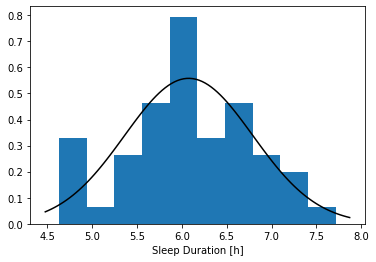

In [30]:
plt.hist(slp_df_clean['Time Asleep'], bins = 10, density = True)

mu, sigma = norm.fit(slp_df_clean['Time Asleep'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k')
plt.xlabel('Sleep Duration [h]')

In [31]:
print(f"Average Sleep Duration: {mu}")

Average Sleep Duration: 6.077210884353742


The cleaned data shows I get only 6 hours of actual sleep on average! I assume the other 1 hour that I usually spend in bed is attributed to fleeting moments of wakefulness and fidgeting. 

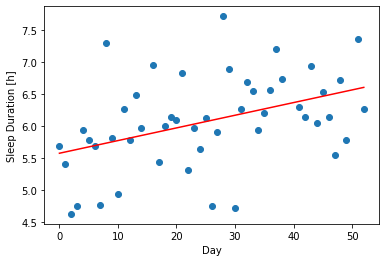

In [33]:
X2 = slp_df_clean.index.values.reshape(-1, 1)
Y2 = slp_df_clean['Time Asleep'].values.reshape(-1, 1)

linear_regressor2 = LinearRegression()
linear_regressor2.fit(X2, Y2)
Y_pred2 = linear_regressor2.predict(X2)

plt.scatter(X2, Y2)
plt.plot(X2, Y_pred2, color = 'red')
plt.xlabel("Day")
plt.ylabel("Sleep Duration [h]")
plt.show()

In [34]:
print(f'R2 value: {linear_regressor2.score(X2, Y2)} \nSlope: {linear_regressor2.coef_[0][0]} \nIntercept: {linear_regressor2.intercept_[0]}')

R2 value: 0.1761104512950623 
Slope: 0.0197545693005571 
Intercept: 5.579718261560121


So, if we look at the cleaned data, the general trend is that I am getting longer sleep durations. That's a good thing!

<AxesSubplot:xlabel='Date', ylabel='Total Deep Sleep Duration'>

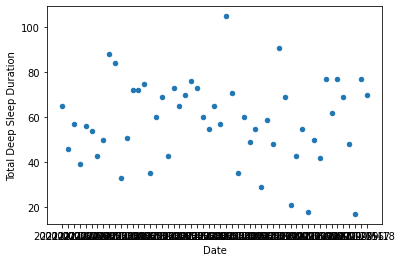

In [35]:
slp_df.plot.scatter(x = 'Date', y = 'Total Deep Sleep Duration')

<AxesSubplot:xlabel='Date', ylabel='Total Deep Sleep Duration'>

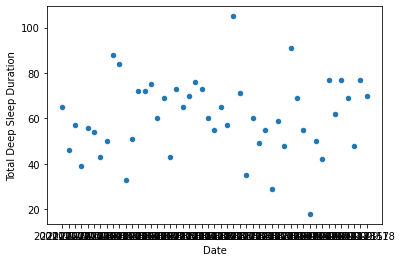

In [36]:
slp_df_clean.plot.scatter(x = 'Date', y = 'Total Deep Sleep Duration')

## Plot and Histogram of Heart Rate

Text(0, 0.5, 'Density')

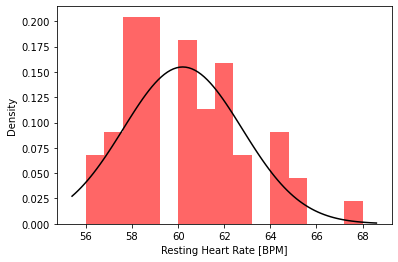

In [39]:
plt.hist(heart_df['Resting Heart Rate'], bins = 15, density = True, color = 'r', alpha = 0.6)

mu, sigma = norm.fit(heart_df['Resting Heart Rate'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k')
plt.xlabel('Resting Heart Rate [BPM]')
plt.ylabel('Density')

In [40]:
print("Average Resting Heart Rate: ", mu)

Average Resting Heart Rate:  60.2


### How Resting Heart Rate Trends

Text(0, 0.5, 'Resting Heart Rate [BPM]')

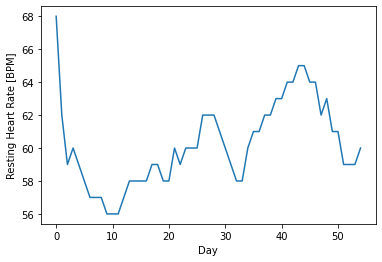

In [57]:
plt.plot(heart_df.index, heart_df['Resting Heart Rate'])
plt.xlabel('Day')
plt.ylabel('Resting Heart Rate [BPM]')

### Relation between resting heart rate and amount of exercise

Text(0, 0.5, 'Resting Heart Rate [BPM]')

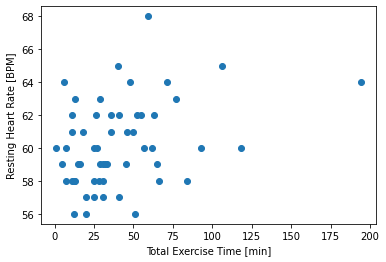

In [56]:
x = heart_df['Total Exercise Time [min]']
y = heart_df['Resting Heart Rate']

plt.scatter(x,y)
plt.xlabel('Total Exercise Time [min]')
plt.ylabel('Resting Heart Rate [BPM]')

Exercise on **the same day** does not lower resting heart rate. If anything, it increases it on the same day! 

However, what if we look at resting heart rate in relation to exercise activity on **the previous 7 days**?

In [73]:
heart_df['Average Exercise Time [min]'] = heart_df['Total Exercise Time [min]'].rolling(7).mean()
heart_df

<ipython-input-73-a2a5f9e5e72d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df['Average Exercise Time [min]'] = heart_df['Total Exercise Time [min]'].rolling(7).mean()


,Date,Resting Heart Rate,Rest [min],Fat Burn [min],Cardio [min],Peak [min],Total Exercise Time [min],Average Exercise Time [min]
6,2021-07-31,57,1413,25,0,0,25,NaN
7,2021-08-01,57,1394,41,0,0,41,NaN
8,2021-08-02,57,1404,31,0,0,31,NaN
9,2021-08-03,56,1422,12,0,0,12,NaN
10,2021-08-04,56,1413,20,0,0,20,NaN
11,2021-08-05,56,1377,51,0,0,51,NaN
12,2021-08-06,57,1417,20,0,0,20,28.571429
13,2021-08-07,58,1038,28,0,0,28,29.000000
14,2021-08-08,58,1405,31,0,0,31,27.571429
15,2021-08-09,58,1410,25,0,0,25,26.714286


In [74]:
heart_df = heart_df.dropna()

Text(0, 0.5, 'Resting Heart Rate [BPM]')

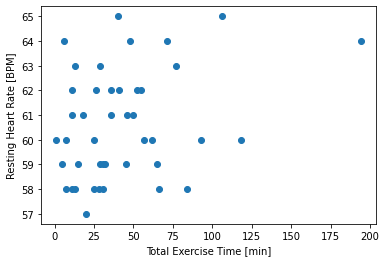

In [75]:
x = heart_df['Total Exercise Time [min]']
y = heart_df['Resting Heart Rate']

plt.scatter(x,y)
plt.xlabel('Total Exercise Time [min]')
plt.ylabel('Resting Heart Rate [BPM]')

# Relation Between Sleep and Resting Heart Rate

Incomplete